# Activity 7: Application of PCA to MNIST
## Relation between PCA and Autoencoder with linear activation
- MNIST dataset consists of 60000 28x28 pixel images in 10 classes (0~9)
- Dimenstions of datasets are Train: (55000,28,28) Test: (10000,28,28)

### _Tip> shortcuts for Jupyter Notebook_
- Shift + Enter : run cell and select below

### _Library_
- Tensorflow: An open source machine learning library. In this practice we will also use it to download datasets
- Numpy: Fundamental package for array calculation
- Matplotlib: Library for plotting
- Sklearn: Library that contains basic classifiers

## 1.1 DownLoad data

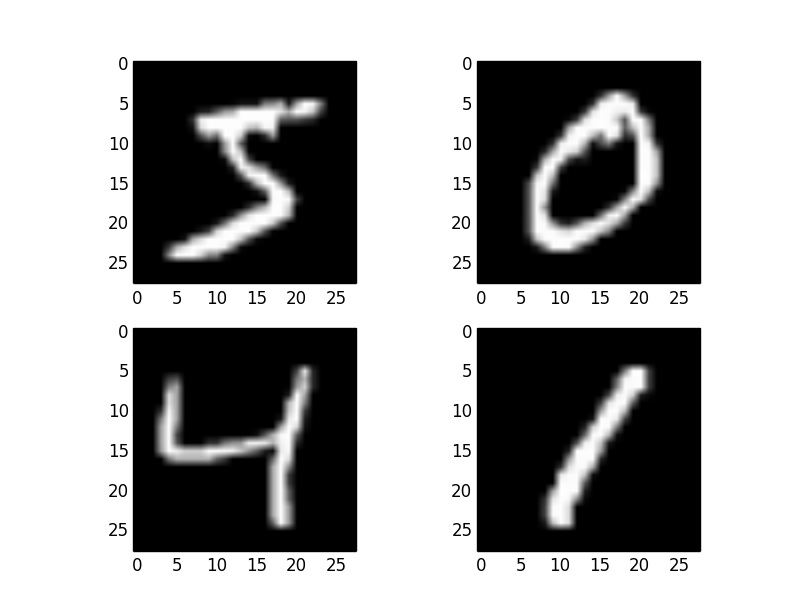
- MNIST(28x28 Hand written digit image) will be used from tensorflow library
- ignore the warning message

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

mnist = input_data.read_data_sets("/tmp/data/")

X = mnist.train.images
y = mnist.train.labels

## 1.2 Preprocessing
- For each Digit, select 10 samples each

In [ ]:
Data = X[np.argwhere(y == 0)[:10]].reshape(10,784)
for i in range(9):
    temp = X[np.argwhere(y == i+1)[:10]]
    temp = temp.reshape(10,784)
    Data = np.vstack([Data,temp])

## 1.3 Visualize the Original Data
- Dataset is ordered in size with 10 samples each
- Below plotting shows 0,10,20 ... 100 th images of dataset

In [ ]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1,10,figsize=(14,5),subplot_kw = {'xticks':[], 'yticks':[]})

for i in range(10):
    axes[i].imshow(Data[10*i].reshape([28,28]), cmap = 'gray')
fig.show()

- From sklearn.decomposition, import PCA
- **n_components** means the **number of features for dimension-reduced dataset**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
Data_reduced = pca.fit_transform(Data)
print("Shape of Data_reduced:",np.shape(Data_reduced))

## 1.4 Visualize the PCA's Input and Output
- Sklearn provide function **pca.inverse_transform** for recover demension reduced image

In [ ]:
import matplotlib.pyplot as plt

image = Data_reduced[50:60]
image = pca.inverse_transform(image)

fig,axes = plt.subplots(2,10,figsize=(20,5),subplot_kw = {'xticks':[], 'yticks':[]})

for i in range(10):
    temp = image[i]
    temp = temp.reshape((28,28))
    axes[0][i].imshow(temp,cmap='gray')
axes[0][4].set_title('Recovered Images',position=(0.5,1.1),fontsize=30)

for i in range(10):
    temp = Data[50+i].reshape((28,28))
    axes[1][i].imshow(temp,cmap="gray")
axes[1][4].set_title('Original Images',position=(0.5,1.1),fontsize=30)

## 2 Evaluate the RMSE(Root Mean Square Error)
- Evaluate the RMSE given, 
$$RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(X_i -X_{reduced,i}\Big)^2}}$$ of the 100 digits n_components = 50

In [ ]:
Data_recovered = pca.inverse_transform(Data_reduced)
np.sum(np.square(Data-Data_recovered))

## 3.1 Autoencoder Design
- Consider an autoencoder with one hidden layer and linear activation functions.
- The number of units in the hidden layer is 50. The input to the autoencoder is the 100 digits downloaded above. 
- Train the autoencoder until the RMSE between the input and output images is less than that of the PCA above

In [ ]:
import tensorflow as tf
def Autoencoder(X, n_hidden):
    w_init = 
    b_init = 

    W_1 = 
    b_1 = 

    h1 = tf.matmul(X,W_1) + b_1

    W_2 = 
    b_2 = 

    X_pred = 

    loss = tf.sqrt(tf.reduce_mean(tf.square(X_pred-X)))
    return loss, X_pred

## 3.2 Hyperparameter Tuning
- n_hidden: number of hidden layer units
- learning_rate: learning rate of optimizer

In [ ]:
n_hidden = 
learning_rate = 

In [ ]:
X = tf.placeholder(tf.float32,[None,784])

loss,X_pred = Autoencoder(X,n_hidden)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range():
        _loss, _ = sess.run([loss,optimizer], feed_dict = {X: Data})
        if i% == 0:
            print("Epoch:",i,"Sum of Squared Error:",_loss)
    Recovered = sess.run(X_pred, feed_dict = {X: Data[50:60]})

## 3.3 Visualize the Autoencoder's Input and Output
- Show the input and output images of the digit "5"